In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud

In [ ]:

# Loading Restaurant  Dataset

restaurant=pd.read_csv("Res_names.csv")

restaurant.head()

print("Restaurant Shape:", restaurant.shape)
# 105,6

Restaurant Shape: (105, 6)


In [ ]:
# DATA UNDERSTANDING

duplicates = restaurant.duplicated()

# Print the number of duplicate rows
print(duplicates.sum())

0


In [ ]:
# check null values if any

null_values = restaurant.isnull()
null_count = null_values.sum()
print(null_count)

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [ ]:
# Print the DataFrame
print(restaurant)


                                       Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                           

In [ ]:

restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [ ]:
restaurant.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# dropping Dates column
restaurant.drop(columns=['Links'], inplace=True)


In [ ]:
#  Converting the COST column to int
restaurant['Cost'] = restaurant['Cost'].str.replace(',', '', regex=True)  # Remove commas
restaurant['Cost'] = restaurant['Cost'].astype(int)

restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    int64 
 2   Collections  51 non-null     object
 3   Cuisines     105 non-null    object
 4   Timings      104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
# Split the 'Cuisines' column by comma, flatten it, and get unique values
cuisine_list = restaurant['Cuisines'].str.split(', ').explode().str.strip().unique()
num_unique_cuisines = len(cuisine_list)

In [ ]:
print(f"Number of unique cuisines: {num_unique_cuisines}")

Number of unique cuisines: 44


In [ ]:
print("List of unique cuisines:")
print(cuisine_list)

List of unique cuisines:
['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Beverages' 'Goan'
 'Healthy Food' 'Lebanese' 'American' 'Ice Cream' 'Street Food'
 'Fast Food' 'BBQ' 'Italian' 'Finger Food' 'Burger' 'Japanese' 'Salad'
 'Sushi' 'Mexican' 'Mughlai' 'Andhra' 'Bakery' 'Juices' 'Arabian'
 'Hyderabadi' 'Cafe' 'Spanish' 'Wraps' 'Thai' 'Indonesian' 'Modern Indian'
 'Momos' 'Pizza' 'North Eastern' 'Mithai' 'Malaysian']


In [ ]:
# REVIEW DATA

reviews=pd.read_csv("Res_reviews.csv")

reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
print("Reviews Shape:", reviews.shape)

Reviews Shape: (10000, 7)


In [ ]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
duplicates = reviews.duplicated()

# Print the number of duplicate rows
print(duplicates.sum())

36


In [ ]:
null_values = reviews.isnull()
null_count = null_values.sum()
print(null_count)

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


# There are null values present in reviewer,review,rating,metadata and time column


In [ ]:
print(reviews)

            Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                        

In [ ]:
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [ ]:
# dropping Pictures column , as it is not needed for our analysis
reviews.drop(columns=['Pictures'], inplace=True)



In [ ]:
# Check if there are any NaN values in rating column
print(reviews['Rating'].isna().sum())


38


In [ ]:
# Optionally, view the rows with NaN values
nan_rows = reviews[reviews['Rating'].isna()]
print(nan_rows)

               Restaurant Reviewer Review Rating Metadata Time
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN
8791  American Wild Wings      NaN    NaN    NaN      N

In [ ]:
# replace non numbers with NAN
reviews.Rating = pd.to_numeric(reviews.Rating, errors='coerce')

In [ ]:
# Drop all rows with any NaN values in the entire dataset
reviews= reviews.dropna()

In [ ]:
# Extracting the number of reviews and followers
reviews[['No of Reviews', 'No of Followers']] = reviews['Metadata'].str.extract(r'(\d+) Reviews , (\d+) Followers')


In [ ]:
# Convert extracted values to integers and  Fill NaN values with 0
reviews['No of Followers'] = reviews['No of Followers'].fillna(0).astype(int)
reviews['No of Reviews'] = reviews['No of Reviews'].fillna(0).astype(int)


In [ ]:
# Then drop the 'Metadata' column
reviews.drop(columns=['Metadata'], inplace=True)


In [ ]:
# Download necessary NLTK data (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [ ]:
# Function to clean individual reviews
def clean_text(text):
    # 1. Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)

    # 2. Remove special characters and numbers (keep only alphabets)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. Remove stopwords and apply lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Rejoin the cleaned words
    return ' '.join(words)


In [ ]:
#  Apply the cleaning function to 'Review' and save back into the same column
reviews['Review'] = reviews['Review'].apply(clean_text)


In [ ]:
# Verify the changes
print(reviews['Review'].head(10))


0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen da arun great guy behavior sincerety go...
4    food goodwe ordered kodi drumstick basket mutt...
5    ambiance good service good food apradeecp subr...
6    nice place ambience different food ordered tas...
7    well reading many review finally visited place...
8    excellent food specially like spicy food court...
9    came birthday treat close friend perfect place...
Name: Review, dtype: object


 DATA VISUALIZATION

Restaurant Costs in Hyderabad: Most and Least Expensive

<ipython-input-37-05b65aa7d5a5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cost', y='Name', data=combined_data, palette='Set2')


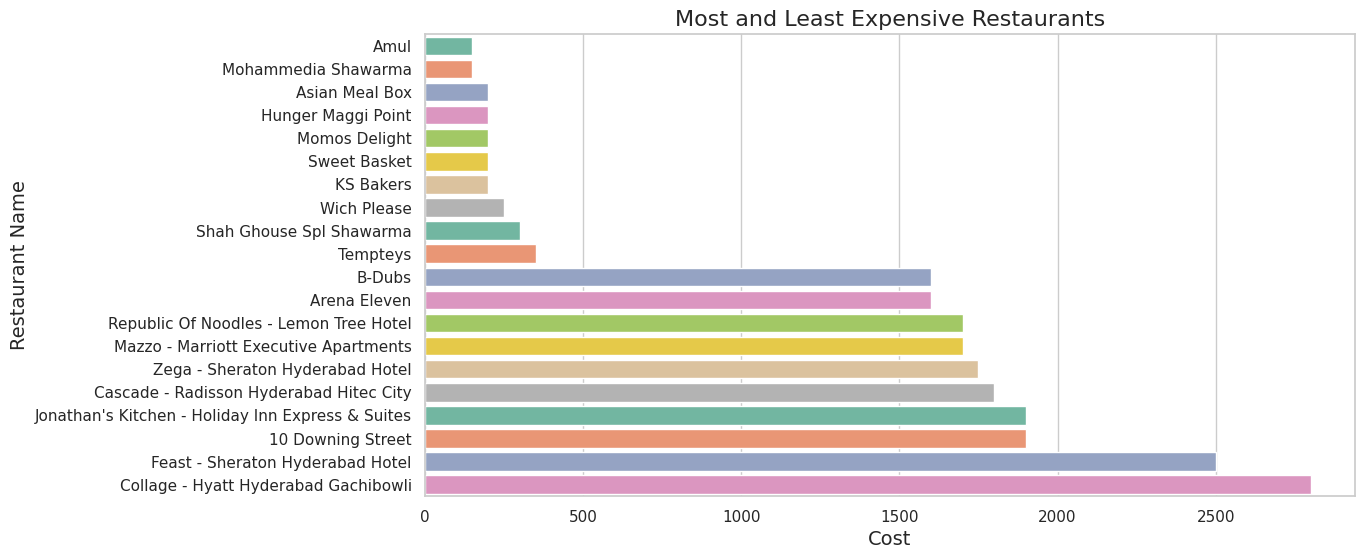

In [ ]:
sorted_res= restaurant.sort_values(by='Cost', ascending=True)

# Select the least and most expensive restaurants
least_expensive = sorted_res.head(10)  # 10 least expensive
most_expensive = sorted_res.tail(10)   # 10 most expensive

# Combine both for plotting
combined_data = pd.concat([least_expensive, most_expensive])

# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Cost', y='Name', data=combined_data, palette='Set2')

# Adding titles and labels
plt.title('Most and Least Expensive Restaurants', fontsize=16)
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)

# Display the plot
plt.show()

In [ ]:
print("\n Statistics for top 20 Most expensive restaurants")
print(most_expensive.describe())


 Statistics for top 20 Most expensive restaurants
              Cost
count    10.000000
mean   1925.000000
std     402.250613
min    1600.000000
25%    1700.000000
50%    1775.000000
75%    1900.000000
max    2800.000000


In [ ]:
print("\n Statistics for top 20 Least expensive Most restaurants")
print(least_expensive.describe())



 Statistics for top 20 Least expensive Most restaurants
             Cost
count   10.000000
mean   220.000000
std     63.245553
min    150.000000
25%    200.000000
50%    200.000000
75%    237.500000
max    350.000000


CUISINE POPULARITY

<ipython-input-40-bc3c079b290b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Greens')


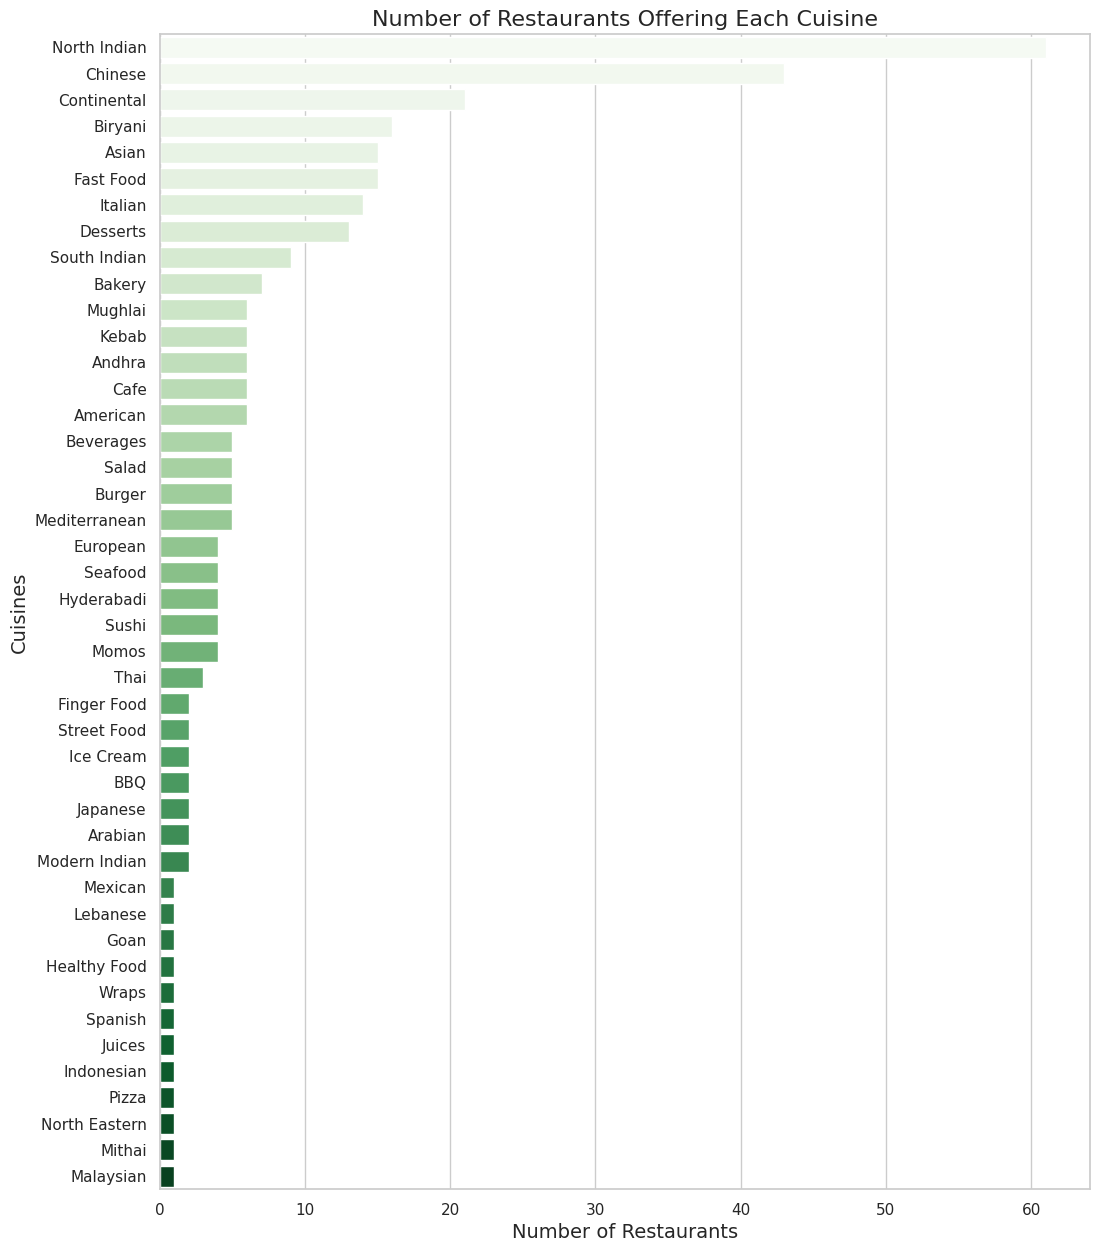

In [ ]:
# Split and explode the 'Cuisines' column to flatten it
exploded_cuisines = restaurant['Cuisines'].str.split(', ').explode().str.strip()

# Count the occurrences of each cuisine
cuisine_counts = exploded_cuisines.value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 15))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Greens')

plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Cuisines', fontsize=14)
plt.title('Number of Restaurants Offering Each Cuisine', fontsize=16)
plt.show()

RATING DISTRIBUTION


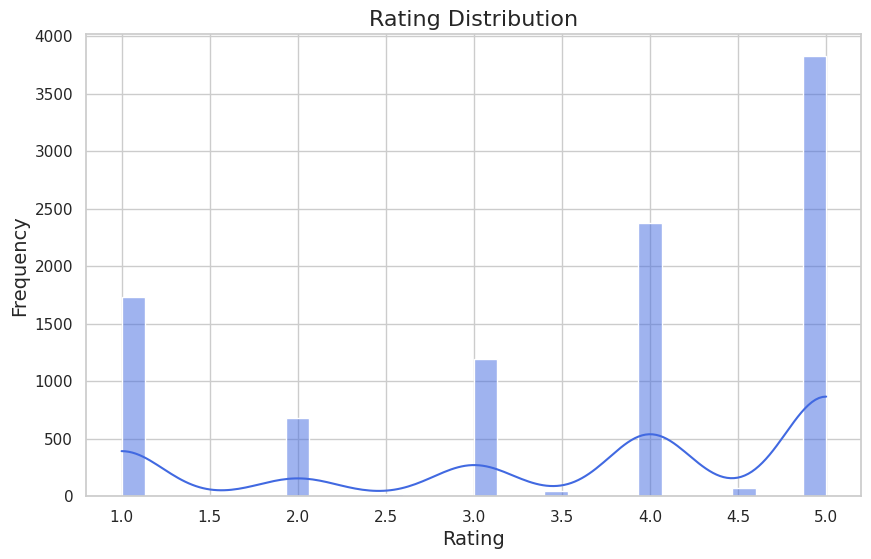

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=reviews, x='Rating', bins=30, kde=True, color='Royalblue')

# Adding titles and labels
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

COST DISTRIBUTION


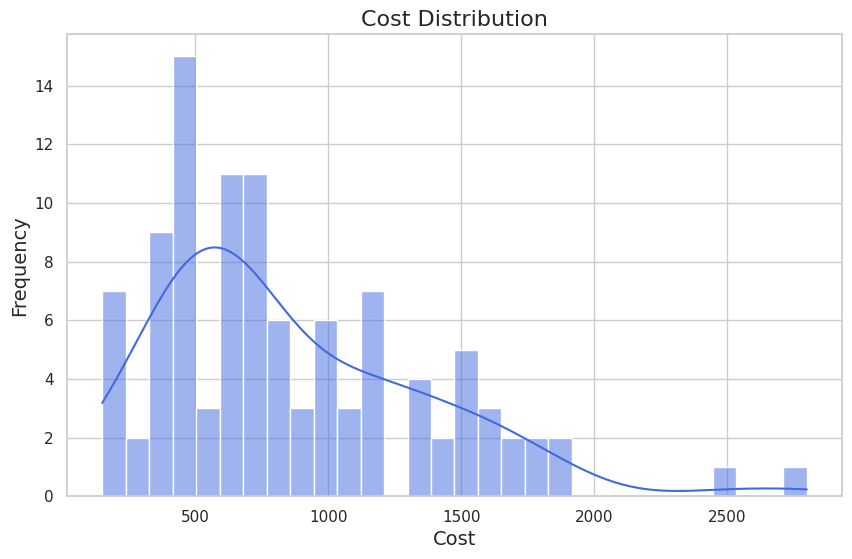

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=restaurant, x='Cost', bins=30, kde=True, color='Royalblue')

# Adding titles and labels
plt.title('Cost Distribution', fontsize=16)
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [ ]:
stats=restaurant['Cost'].describe()
stats

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


COLLECTIONS WORD CLOUD

Most Common Taggs:


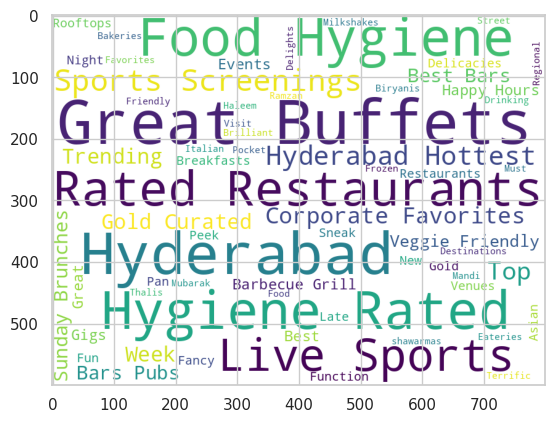

In [ ]:
collections = restaurant['Collections'].dropna().tolist()
collections = ', '.join(i for i in collections)

wc = WordCloud(background_color="white", max_words=200,
               width=800, height=600, random_state=1).generate(collections)
print("Most Common Taggs:")
plt.imshow(wc)


TOP REVIWERS

<ipython-input-49-91a92b933d98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette="rocket")


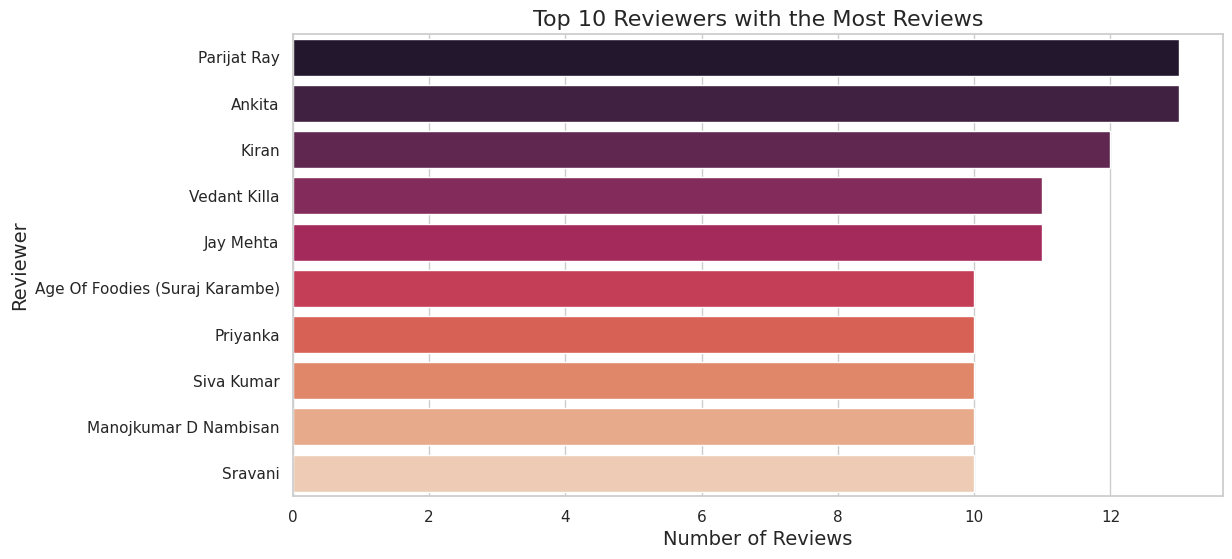

In [ ]:
# Group by reviewer and count the number of reviews
top_reviewers = reviews['Reviewer'].value_counts().head(10)  # Top 10 reviewers

# Set the plot style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette="rocket")

# Add titles and labels
plt.title('Top 10 Reviewers with the Most Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Reviewer', fontsize=14)

# Display the plot
plt.show()

 RESTAURANTS WITH HIGHEST RATINGS


<ipython-input-50-a9fef0158782>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_restaurants.values, y=top_rated_restaurants.index, palette='mako')


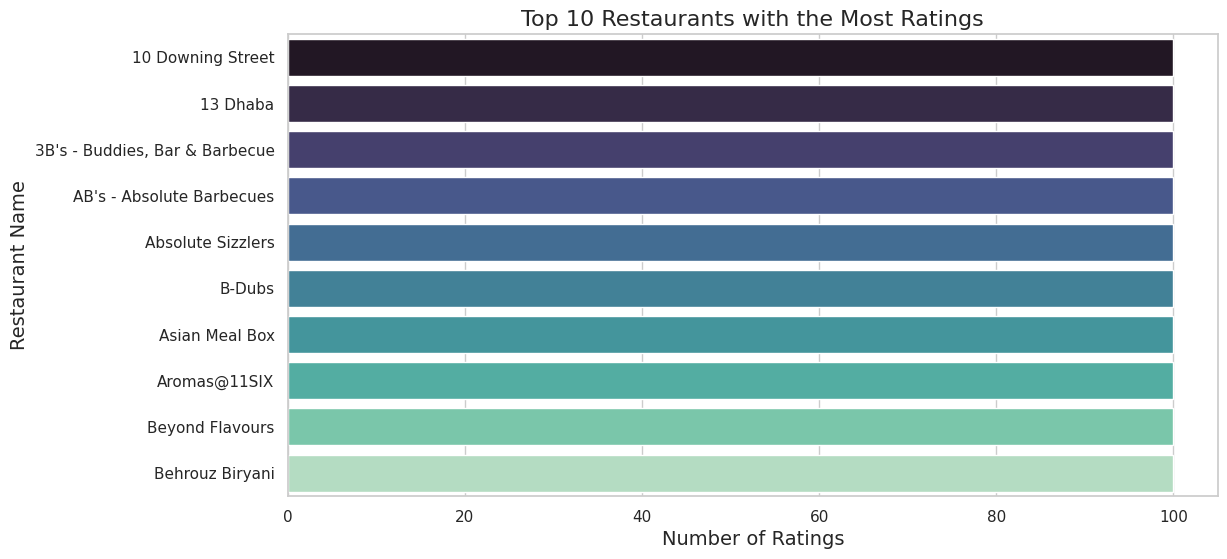

In [ ]:
# Group by restaurant and sum their ratings
top_rated_restaurants = reviews.groupby('Restaurant')['Rating'].count().sort_values(ascending=False).head(10)

# Set the plot style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_restaurants.values, y=top_rated_restaurants.index, palette='mako')

# Add titles and labels
plt.title('Top 10 Restaurants with the Most Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.show()

In [ ]:
# MERGING TWO DATASETS

# Merge two DataFrames on a common column, e.g., 'Name'
merged_data = pd.merge(reviews, restaurant, left_on='Restaurant', right_on='Name', how='inner')
print(merged_data.head(5))


        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating             Time  \
0  ambience good food quite good saturday lunch c...     5.0  5/25/2019 15:54   
1  ambience good pleasant evening service prompt ...     5.0  5/25/2019 14:20   
2  must try great food great ambience thnx servic...     5.0  5/24/2019 22:54   
3  soumen da arun great guy behavior sincerety go...     5.0  5/24/2019 22:11   
4  food goodwe ordered kodi drumstick basket mutt...     5.0  5/24/2019 21:37   

   No of Reviews  No of Followers             Name  Cost  \
0              0                0  Beyond Flavours   800   
1              3                2  Beyond Flavours   800   
2              2                3  Beyond Flavours   800   
3       

In [ ]:
merged_data = merged_data.drop('Name', axis=1)
print(merged_data.head(5))



        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating             Time  \
0  ambience good food quite good saturday lunch c...     5.0  5/25/2019 15:54   
1  ambience good pleasant evening service prompt ...     5.0  5/25/2019 14:20   
2  must try great food great ambience thnx servic...     5.0  5/24/2019 22:54   
3  soumen da arun great guy behavior sincerety go...     5.0  5/24/2019 22:11   
4  food goodwe ordered kodi drumstick basket mutt...     5.0  5/24/2019 21:37   

   No of Reviews  No of Followers  Cost  \
0              0                0   800   
1              3                2   800   
2              2                3   800   
3              0                0   800   
4              3                2

ANALYZE AVERAGE RATINGS PER CUISINE

<ipython-input-53-aa288d531743>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='Set1')


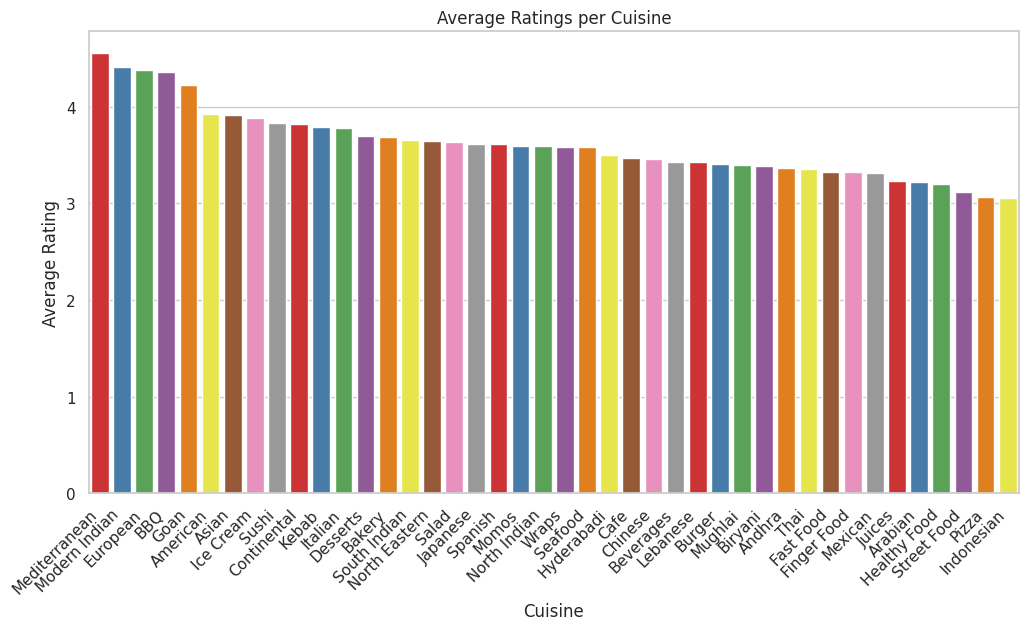

In [ ]:
# Split cuisines and calculate average rating per cuisine
cuisine_ratings = (
    merged_data.assign(Cuisines=merged_data['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .groupby('Cuisines')['Rating']
    .mean()
    .sort_values(ascending=False)
)

# Plot the average ratings per cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

Top 10 RESTAURANTS WITH MOST NUMBER OF REVIEWS


<ipython-input-54-e552fcff6d5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_restaurant.index, y=reviews_per_restaurant.values, palette='crest')


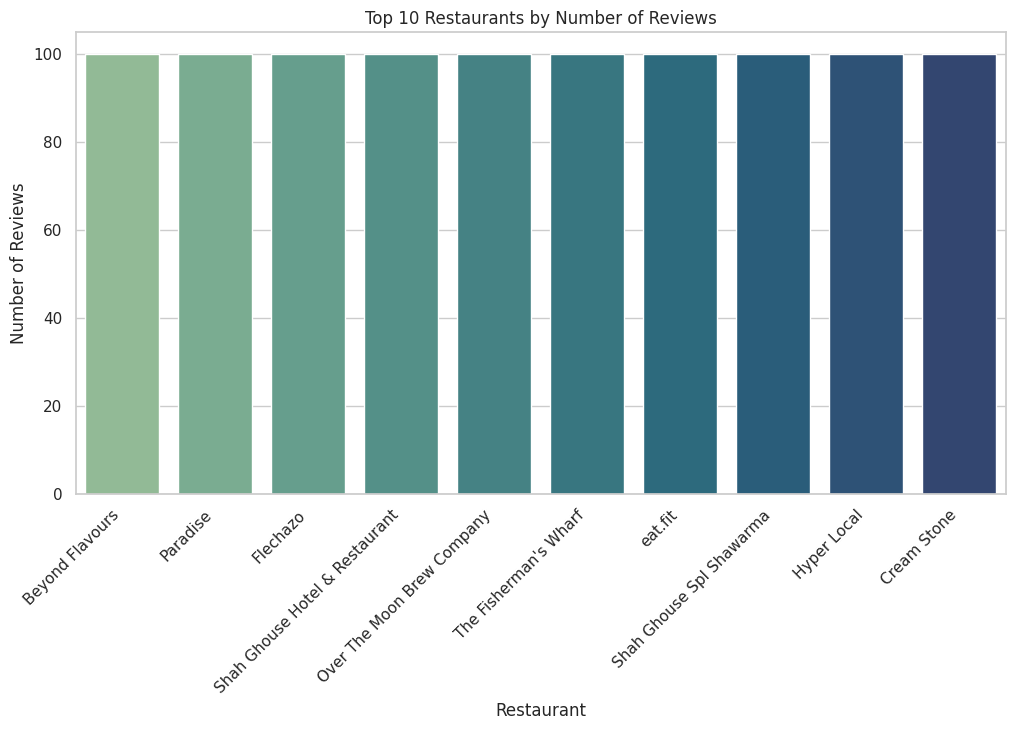

In [ ]:
reviews_per_restaurant = merged_data['Restaurant'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_per_restaurant.index, y=reviews_per_restaurant.values, palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()


AVERAGE COST BY CUISINES

<ipython-input-56-014432d27130>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_costs.index, y=cuisine_costs.values, palette='viridis')


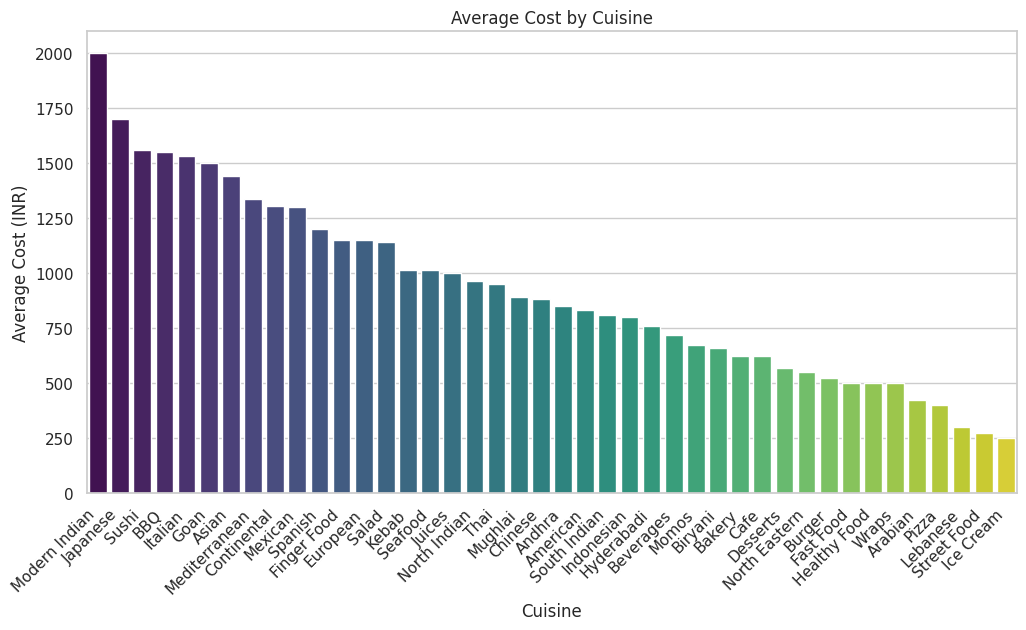

In [ ]:
cuisine_costs = (
    merged_data.assign(Cuisines=merged_data['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .groupby('Cuisines')['Cost']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_costs.index, y=cuisine_costs.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Cost by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost (INR)')
plt.show()

TOP 10 COLLECTIONS BY RESTAURANT COUNT


<ipython-input-57-e27645f21fab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_collections.index, y=top_collections.values, palette='plasma')


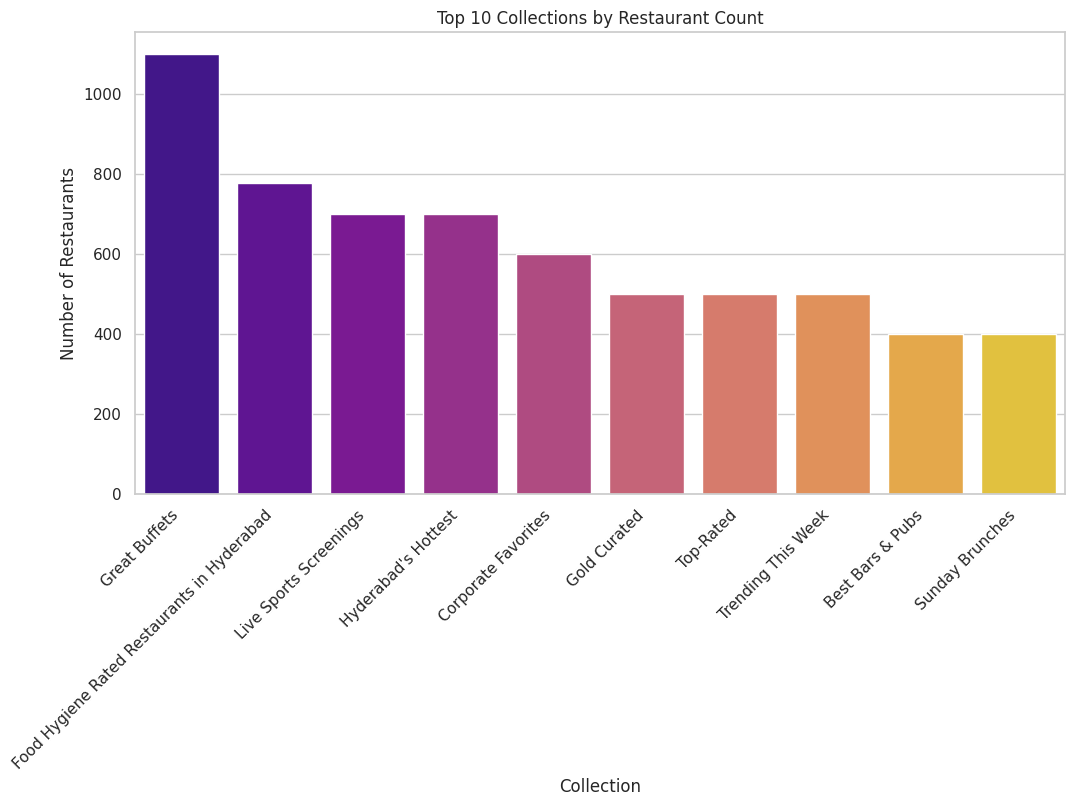

In [ ]:
collections = merged_data.assign(Collections=merged_data['Collections'].str.split(', ')).explode('Collections')

top_collections = collections['Collections'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_collections.index, y=top_collections.values, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Collections by Restaurant Count')
plt.xlabel('Collection')
plt.ylabel('Number of Restaurants')
plt.show()

TOP 10 CUISINES


<ipython-input-61-62718cac6176>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='crest')


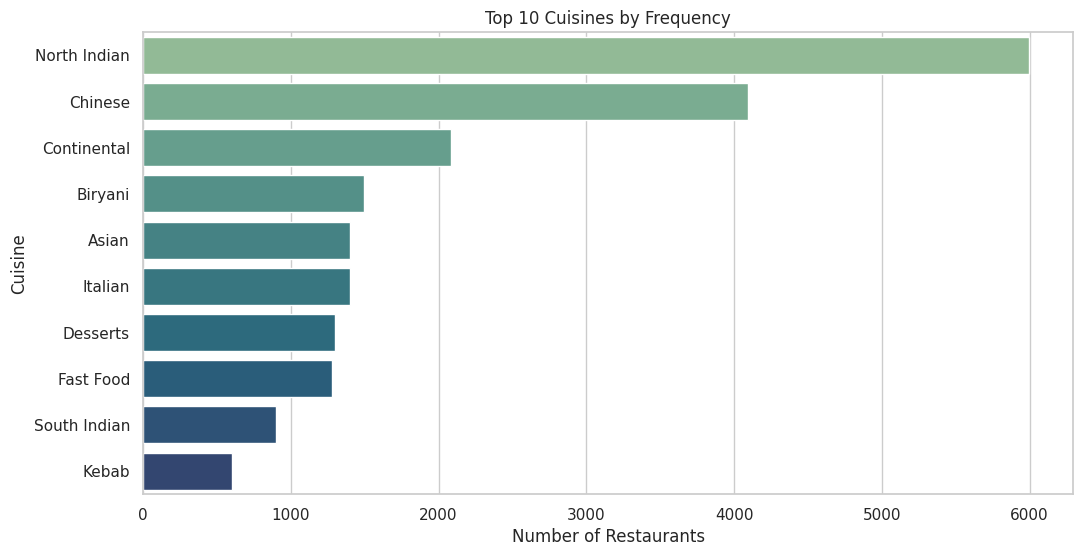

In [ ]:
# Split the 'Cuisines' column into individual cuisines and explode them into separate rows
cuisines_data = merged_data.assign(Cuisines=merged_data['Cuisines'].str.split(', ')).explode('Cuisines')

# Count the occurrences of each cuisine and select the top 10
top_cuisines = cuisines_data['Cuisines'].value_counts().head(10)

# Plot the top 10 cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='crest')
plt.title('Top 10 Cuisines by Frequency')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

SENTIMENT ANALYSIS

In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# 1. Using TextBlob for Sentiment Analysis
def get_sentiment_textblob(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Add sentiment scores to your reviews DataFrame
merged_data['sentiment_score'] = merged_data['Review'].apply(get_sentiment_textblob)


In [ ]:
# 2. Using VADER for Sentiment Analysis
sia = SentimentIntensityAnalyzer()
merged_data['vader_sentiment'] = merged_data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])



DISTRIBUTION OF SENTIMENT SCORES


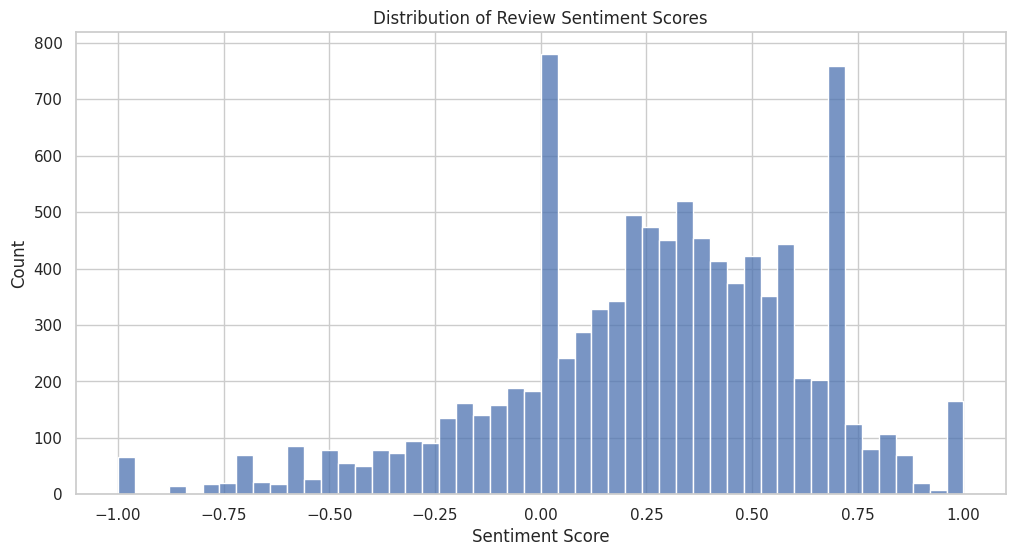

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='sentiment_score', bins=50)
plt.title('Distribution of Review Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

AVERAGE  SENTIMENT BY RESTAURANT

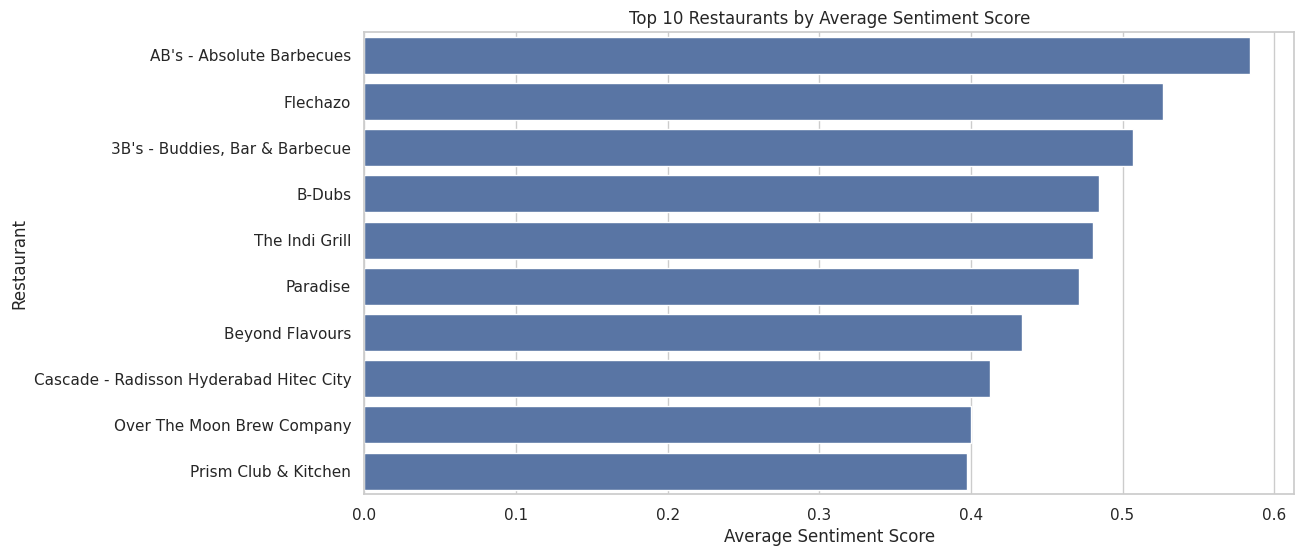

In [ ]:
avg_sentiment = merged_data.groupby('Restaurant')['sentiment_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sentiment.head(10).values, y=avg_sentiment.head(10).index)
plt.title('Top 10 Restaurants by Average Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.show()

WORD CLOUDS FOR POSITIVE REVIEWS AND NEGATIVE REVIEWS

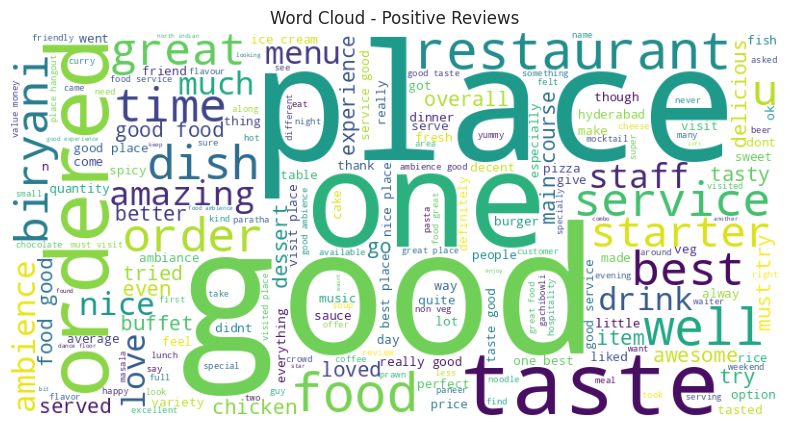

In [ ]:
positive_reviews = merged_data[merged_data['sentiment_score'] > 0]['Review']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(background_color='white', width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive)
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

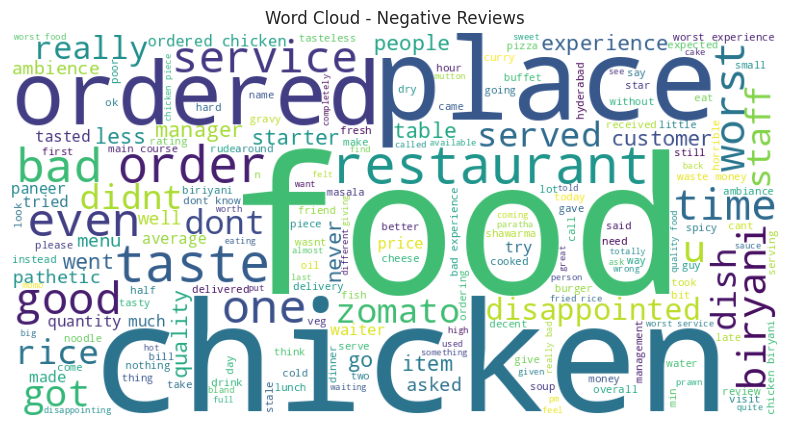

In [ ]:
negative_reviews = merged_data[merged_data['sentiment_score'] < 0]['Review']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(background_color='white', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative)
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()


AVERAGE SENTIMENT BY CUISINES

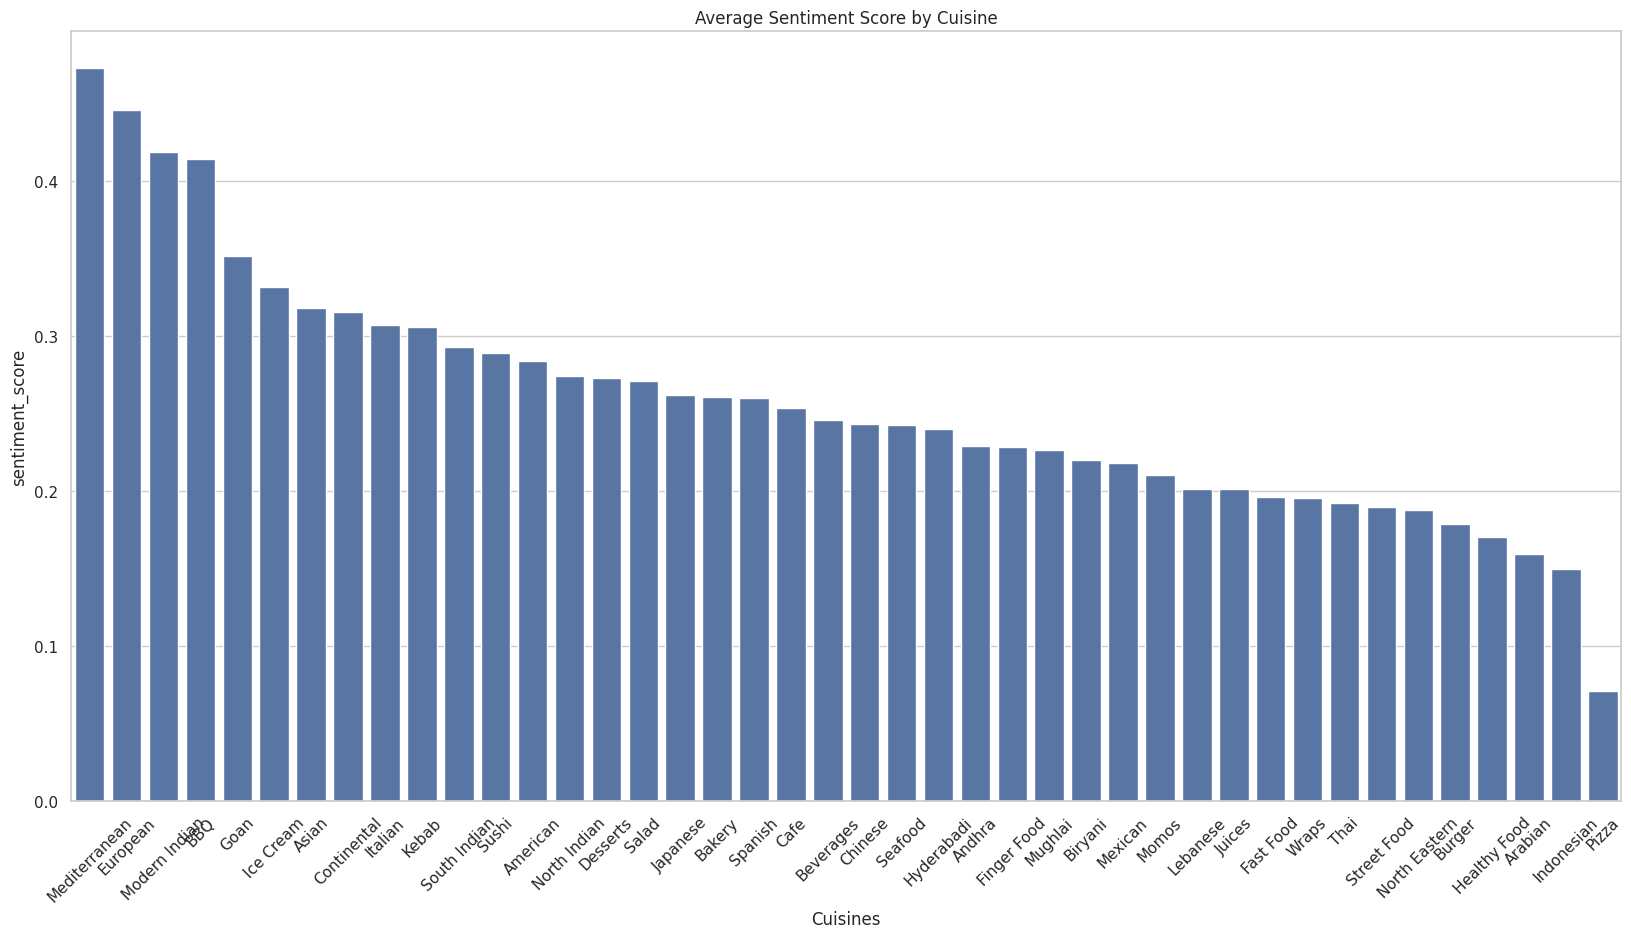

In [ ]:
cuisine_sentiment = (
    merged_data.assign(Cuisines=merged_data['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .groupby('Cuisines')['sentiment_score']
    .mean()
    .sort_values(ascending=False)
    # Make sure to keep the 'sentiment_score' column here
    .reset_index()  # Reset the index if needed
)

plt.figure(figsize=(20,10))
sns.barplot(x=cuisine_sentiment['Cuisines'], y=cuisine_sentiment['sentiment_score'])
plt.xticks(rotation=45)
plt.title('Average Sentiment Score by Cuisine')
plt.show()


DISTRIBUTION OF SENTIMENT SCORES


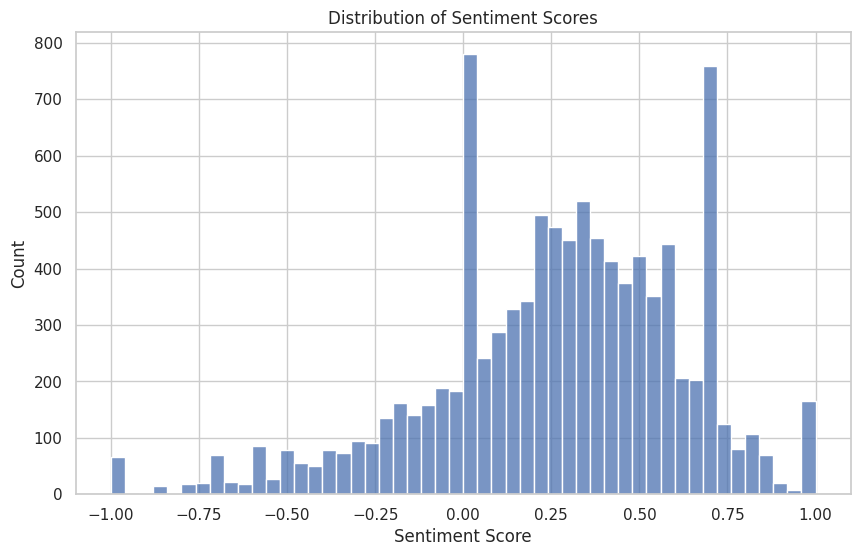

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='sentiment_score', bins=50)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

AVERAGE SENTIMENT BY RATING

In [ ]:
print("\nAverage Sentiment by Rating:")
avg_sentiment_by_rating = merged_data.groupby('Rating')['sentiment_score'].mean().sort_values(ascending=False)
print(avg_sentiment_by_rating)



Average Sentiment by Rating:
Rating
5.0    0.478974
4.5    0.353417
4.0    0.336378
3.5    0.279409
3.0    0.196159
2.5    0.163420
2.0    0.026337
1.5   -0.043274
1.0   -0.178497
Name: sentiment_score, dtype: float64


In [ ]:
print("Sentiment Analysis Summary:")
print(f"Average Sentiment Score: {merged_data['sentiment_score'].mean():.3f}")
print(f"Percentage of Positive Reviews: {(merged_data['sentiment_score'] > 0).mean()*100:.1f}%")
print(f"Percentage of Negative Reviews: {(merged_data['sentiment_score'] < 0).mean()*100:.1f}%")
print(f"Correlation between Rating and Sentiment: {merged_data['sentiment_score'].corr(merged_data['Rating']):.3f}")


Sentiment Analysis Summary:
Average Sentiment Score: 0.263
Percentage of Positive Reviews: 76.3%
Percentage of Negative Reviews: 18.4%
Correlation between Rating and Sentiment: 0.658


In [ ]:
print("\nDetailed Sentiment Breakdown:")
sentiment_categories = pd.cut(merged_data['sentiment_score'],
                            bins=[-1, -0.5, -0.1, 0.1, 0.5, 1],
                            labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
sentiment_distribution = sentiment_categories.value_counts().sort_index()
print(sentiment_distribution)


Detailed Sentiment Breakdown:
sentiment_score
Very Negative     338
Negative          982
Neutral          1618
Positive         4270
Very Positive    2680
Name: count, dtype: int64
